In [39]:
import os
os.getcwd()

'/home/skbae/Documents/skbae/ASD/paper/4.Multimodal_RiskST/model1_TD_vs_High_ASD/TEXT'

In [40]:
# import test
import pandas as pd
#./df_sF_1004_F.csv
# JSON 파일에서 test DataFrame 불러오기 : /data1/workspace/skbae/tta/Text/test_MCHAT_SCQ_0805.json
#/home/skbae/Documents/skbae/ASD/paper/4.Multimodal_RiskST/Process/df_sF_new_test.json
# df_sF4.to_csv("./df_sF_new_test.csv", index=False)
# df_sF4.to_json('./df_sF_new_test.json', orient='records', lines=True)
test = pd.read_json('../../Process/df_sF_new_test.json', orient='records', lines=True)

In [55]:
test2 = pd.read_json('../../Process/test_MCHAT_SCQ_1004.json', orient='records', lines=True)


In [56]:
print(test2.columns)

Index(['SubjectId', 'Class', 'text', 'label'], dtype='object')


In [57]:
import pandas as pd

# 파일을 불러옵니다.
# combined_info = pd.read_csv('./patient_combined_info_0705_Aug01.csv')
# combined_info = pd.read_csv('./Text/patient_combined_info_0805_Aug19.csv')
combined_info = pd.read_csv('/home/skbae/Documents/skbae/ASD/paper/4.Multimodal_RiskST/Process/combined_info_newly_added.csv')
combined_info2 = pd.read_csv('/home/skbae/Documents/skbae/ASD/paper/4.Multimodal_RiskST/Process/patient_combined_info_1004_Oct23_refactored.csv')

# 'Class/ASD' 열이 'ASD'인 행을 선택합니다.
# asd_data = combined_info[combined_info['Class/ASD'] == 'ASD']

# 선택된 데이터를 출력합니다.
print(combined_info.columns)
print(combined_info2.columns)

Index(['Subject_Id', 'Gender', 'Class/ASD', 'Family_History',
       '1st_Screening_ASD_Criteria', 'Premature_Infant', 'Lanuage_Delay',
       '2nd_Screening_ASD_Criteria', 'Congenital_Genetic_Disorder',
       'History_of_Brain_Damage', 'Seizure_or_Neurological_disease', 'class'],
      dtype='object')
Index(['Subject_Id', 'Gender', 'Class/ASD', 'Family_History',
       '1st_Screening_ASD_Criteria', 'Premature_Infant', 'Lanuage_Delay',
       '2nd_Screening_ASD_Criteria', 'Congenital_Genetic_Disorder',
       'History_of_Brain_Damage', 'Seizure_or_Neurological_disease', 'class'],
      dtype='object')


In [8]:
import os
import pandas as pd
import shutil
import tqdm
import glob

In [44]:
# asd_data와 test_data를 Subject_Id 열을 기준으로 왼쪽 조인합니다.
# 'SubjectId'와 'Subject_Id' 열을 문자열로 변환합니다.
test['SubjectId'] = test['SubjectId'].astype(str)
combined_info['Subject_Id'] = combined_info['Subject_Id'].astype(str)
merged_data = pd.merge(test, combined_info, left_on='SubjectId', right_on='Subject_Id', how='left')

# 조인된 결과를 출력합니다.
print(merged_data.shape)
print(merged_data.columns)

(338, 16)
Index(['SubjectId', 'Class', 'text', 'label', 'Subject_Id', 'Gender',
       'Class/ASD', 'Family_History', '1st_Screening_ASD_Criteria',
       'Premature_Infant', 'Lanuage_Delay', '2nd_Screening_ASD_Criteria',
       'Congenital_Genetic_Disorder', 'History_of_Brain_Damage',
       'Seizure_or_Neurological_disease', 'class'],
      dtype='object')


In [58]:
# asd_data와 test_data를 Subject_Id 열을 기준으로 왼쪽 조인합니다.
# 'SubjectId'와 'Subject_Id' 열을 문자열로 변환합니다.
test2['SubjectId'] = test2['SubjectId'].astype(str)
combined_info2['Subject_Id'] = combined_info2['Subject_Id'].astype(str)
merged_data2 = pd.merge(test2, combined_info2, left_on='SubjectId', right_on='Subject_Id', how='left')

# 조인된 결과를 출력합니다.
print(merged_data2.shape)
print(merged_data2.columns)

(99, 16)
Index(['SubjectId', 'Class', 'text', 'label', 'Subject_Id', 'Gender',
       'Class/ASD', 'Family_History', '1st_Screening_ASD_Criteria',
       'Premature_Infant', 'Lanuage_Delay', '2nd_Screening_ASD_Criteria',
       'Congenital_Genetic_Disorder', 'History_of_Brain_Damage',
       'Seizure_or_Neurological_disease', 'class'],
      dtype='object')


In [13]:
# merged_data.head()

In [45]:
# final test datset 

# merged_data를 CSV 파일로 내보냅니다.
# merged_data.to_csv('./final_test_data.csv', index=False)

# 특정 열에 대한 분포를 생성합니다.
class_distribution = merged_data['Class'].value_counts()
gender_distribution = merged_data['Gender'].value_counts()
# screening_distribution = merged_data['1st_Screening_ASD_Criteria'].value_counts()
language_delay_distribution = merged_data['Lanuage_Delay'].value_counts()
asd_class_distribution = merged_data['label'].value_counts()

# 분포 결과를 출력합니다.
print("Class Distribution:\n", class_distribution)
print("Gender Distribution:\n", gender_distribution)
# print("1st Screening ASD Criteria Distribution:\n", screening_distribution)
print("Language Delay Distribution:\n", language_delay_distribution)
print("label:\n", asd_class_distribution)

Class Distribution:
 Class
High    144
TD      120
ASD      74
Name: count, dtype: int64
Gender Distribution:
 Gender
MALE      139
FEMALE     65
Name: count, dtype: int64
Language Delay Distribution:
 Lanuage_Delay
1.0    91
0.0    68
Name: count, dtype: int64
label:
 label
1    218
0    120
Name: count, dtype: int64


In [47]:
# 'Language_Delay' 열에서 'N/A' 값을 확인합니다.
na_language_delay = merged_data['Lanuage_Delay'].isna().sum()

# 'N/A' 값이 있는 행의 개수를 출력합니다.
print(f"'Language_Delay' 열에서 'N/A' 값의 개수: {na_language_delay}")

'Language_Delay' 열에서 'N/A' 값의 개수: 179


In [48]:
# 'Language_Delay' 열이 'N/A'인 행을 필터링합니다.
missing_language_delay = merged_data[merged_data['Lanuage_Delay'].isna()]

# 해당 행의 'Subject_Id'를 출력합니다.
# print(missing_language_delay['Subject_Id'])

In [49]:
missing_language_delay.columns

Index(['SubjectId', 'Class', 'text', 'label', 'Subject_Id', 'Gender',
       'Class/ASD', 'Family_History', '1st_Screening_ASD_Criteria',
       'Premature_Infant', 'Lanuage_Delay', '2nd_Screening_ASD_Criteria',
       'Congenital_Genetic_Disorder', 'History_of_Brain_Damage',
       'Seizure_or_Neurological_disease', 'class'],
      dtype='object')

In [50]:
missing_language_delay['Class'].value_counts()

Class
TD      120
High     52
ASD       7
Name: count, dtype: int64

In [51]:
print(test['label'].value_counts())

label
1    218
0    120
Name: count, dtype: int64


In [ ]:
#Load the Fine-Tuned Model and Tokenizer :/data1/workspace/skbae/tta/Text/ROBERTA_SCQ_MCHAT_all_model_Binary_TD_vs_ASD_High_0805_Aug19F

In [24]:
# pip install torch==2.0.1+cu117 torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu117

In [25]:
# pip install transformers==4.36.2

In [26]:
# pip install scipy==1.9.2

In [27]:
# pip install scikit-learn==1.2.1

In [28]:
# pip install matplotlib==3.6.3

In [ ]:
import torch
from transformers import RobertaForSequenceClassification, RobertaTokenizer
import numpy as np
from scipy.special import softmax
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the pre-trained model and tokenizer:/data1/workspace/skbae/tta/Text/ROBERTA_SCQ_MCHAT_all_model_Binary_TD_vs_ASD_High_0805_Aug19F
# save_directory = "./Text/ROBERTA_SCQ_MCHAT_all_model_Binary_TD_vs_ASD_High_0805_Aug19F"
# save_directory = "../Roberta/ROBERTA_SCQ_MCHAT_all_model_Binary_TD_vs_ASD_High_1004_Oct23F_op1_1st_fold5_nov06f"
save_directory = "/home/skbae/Documents/skbae/ASD/paper/4.Multimodal_RiskST/model1_TD_vs_High_ASD/TEXT/ROBERTA_SCQ_MCHAT_all_model_Binary_TD_vs_ASD_High_1004_Oct23F_op1_1st_labelsplit_nov14f"
# 모델 저장
model = RobertaForSequenceClassification.from_pretrained(save_directory)
tokenizer = RobertaTokenizer.from_pretrained(save_directory)

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

In [60]:
import torch
from transformers import RobertaForSequenceClassification, RobertaTokenizerFast, Trainer, TrainingArguments
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from scipy.special import softmax
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, average_precision_score

# Load the pre-trained model and tokenizer
# model_path = "../Roberta/ROBERTA_SCQ_MCHAT_all_model_Binary_TD_vs_ASD_High_0805_Aug19F"
# model = RobertaForSequenceClassification.from_pretrained(save_directory)
# tokenizer = RobertaTokenizer.from_pretrained(save_directory)

# **Step 1: Load the Fine-Tuned Model and Tokenizer**
def load_fine_tuned_model(model_path):
    model = RobertaForSequenceClassification.from_pretrained(model_path)
    tokenizer = RobertaTokenizerFast.from_pretrained(model_path)
    return model, tokenizer

# **Step 2: Define the Dataset Class (ASD_Dataset)**
class ASD_Dataset(Dataset):
    def __init__(self, encodings, labels, subject_ids):
        self.encodings = encodings
        self.labels = labels
        self.subject_ids = subject_ids

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        item['SubjectId'] = self.subject_ids[idx]
        return item

    def __len__(self):
        return len(self.labels)

# **Step 3: Prepare the Validation Data**
def tokenize_and_pad(tokenizer, dataset):
    return tokenizer(
        dataset['text'].tolist(),
        truncation=True,
        padding=True,
        max_length=567
    )

# def prepare_validation_dataset(tokenizer, val_dataset):
#     val_encodings = tokenize_and_pad(tokenizer, val_dataset)
#     val_subject_ids = val_dataset['SubjectId'].tolist()
#     return ASD_Dataset(val_encodings, val_dataset['label'].tolist(), val_subject_ids)

def prepare_test_dataset(tokenizer, test_dataset):
    test_encodings = tokenize_and_pad(tokenizer, test_dataset)
    test_subject_ids = test_dataset['SubjectId'].tolist()
    return ASD_Dataset(test_encodings, test_dataset['label'].tolist(), test_subject_ids)

In [31]:
# pip install seaborn==0.12.2


Evaluating with threshold: 0.5
F1 Score: 0.9180327868852459
Confusion Matrix:
[[33  4]
 [ 6 56]]
True Positive (TP): 56
False Positive (FP): 4
True Negative (TN): 33
False Negative (FN): 6
True Positive Rate (TPR): 0.9032258064516129
False Positive Rate (FPR): 0.10810810810810811
AUROC: 0.9455100261551874
Prediction Entropy: 4.497284889221191
Confidence Interval for F1 Score: (0.8227329832217524, 1.0133325905487396)


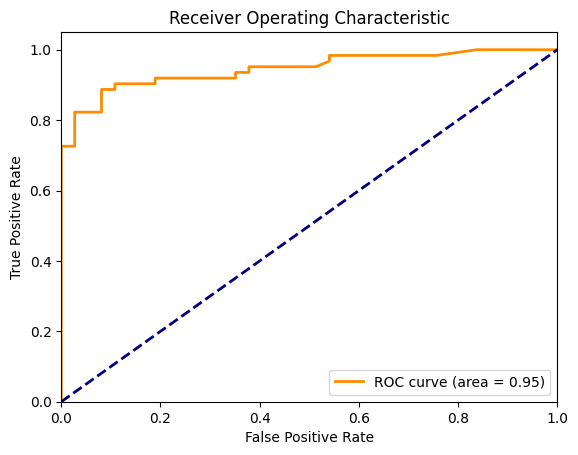

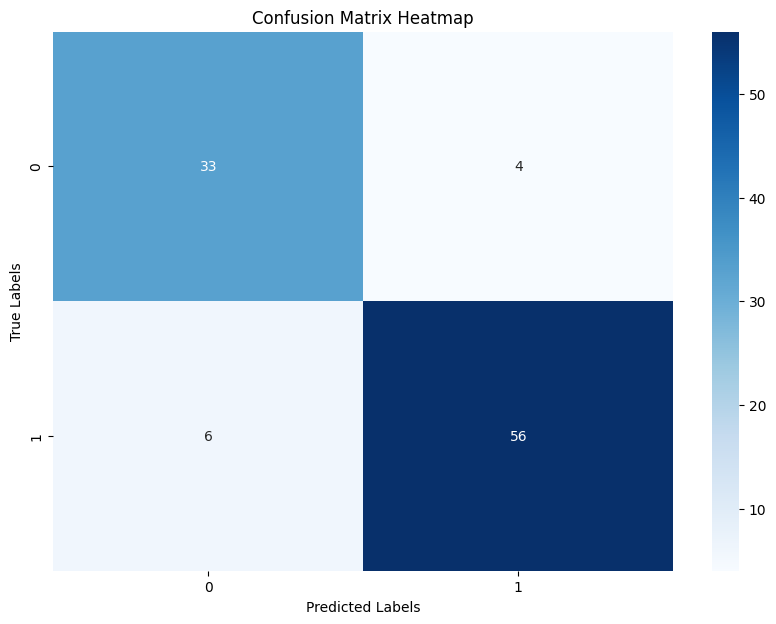


Evaluating with threshold: 0.6
F1 Score: 0.9090909090909091
Confusion Matrix:
[[33  4]
 [ 7 55]]
True Positive (TP): 55
False Positive (FP): 4
True Negative (TN): 33
False Negative (FN): 7
True Positive Rate (TPR): 0.8870967741935484
False Positive Rate (FPR): 0.10810810810810811
AUROC: 0.9455100261551874
Prediction Entropy: 4.497284889221191
Confidence Interval for F1 Score: (0.8137911054274155, 1.0043907127544027)


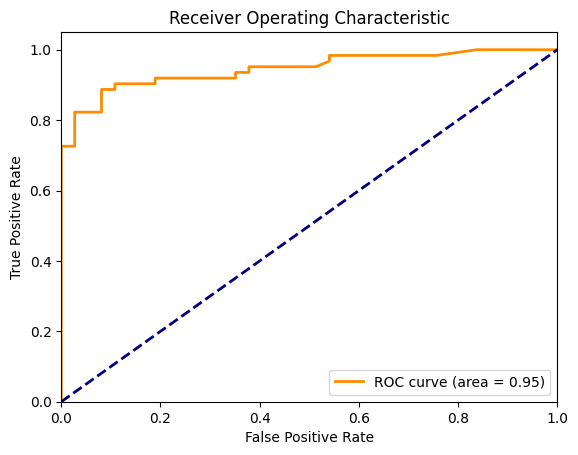

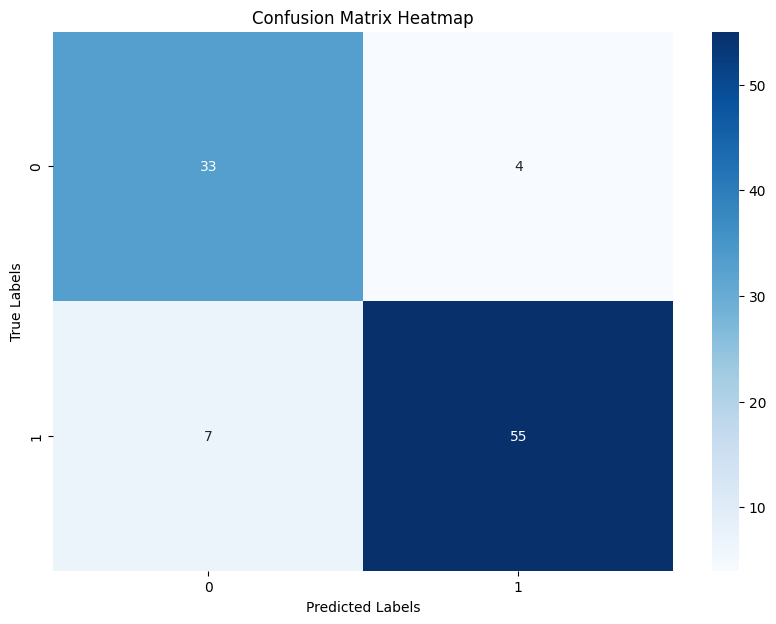

In [61]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score
from scipy.stats import norm, entropy
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import DataLoader
from transformers import RobertaForSequenceClassification, RobertaTokenizerFast

# **Function to Calculate Performance Metrics**
def evaluate_model_performance(model, dataloader, threshold=0.5):
    model.eval()
    all_labels = []
    all_probs = []
    all_preds = []
    
    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch['input_ids']
            attention_mask = batch['attention_mask']
            labels = batch['labels'].cpu().numpy()
            
            logits = model(input_ids=input_ids, attention_mask=attention_mask).logits
            probs = torch.softmax(logits, dim=1).cpu().numpy()
            preds = (probs[:, 1] >= threshold).astype(int)  # Apply threshold
            
            all_labels.extend(labels)
            all_probs.extend(probs[:, 1])  # Assuming class 1 is the positive class
            all_preds.extend(preds)
    
    all_labels = np.array(all_labels)
    all_probs = np.array(all_probs)
    all_preds = np.array(all_preds)
    
    # F1 Score
    f1 = f1_score(all_labels, all_preds)
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(all_labels, all_preds)
    
    # Calculate TP, FP, TN, FN
    TP = conf_matrix[1, 1]
    FN = conf_matrix[1, 0]
    FP = conf_matrix[0, 1]
    TN = conf_matrix[0, 0]
    
    # Calculate TPR and FPR
    TPR = TP / (TP + FN)  # True Positive Rate
    FPR = FP / (FP + TN)  # False Positive Rate
    
    # AUROC and ROC Curve
    auc_score = roc_auc_score(all_labels, all_probs)
    fpr, tpr, _ = roc_curve(all_labels, all_probs)
    
    # Entropy (Uncertainty Measure)
    pred_entropy = entropy(all_probs)
    
    # Confidence Interval for F1 Score
    ci_f1 = norm.interval(0.95, loc=f1, scale=np.std(all_labels)/np.sqrt(len(all_labels)))
    
    return {
        "f1_score": f1,
        "confusion_matrix": conf_matrix,
        "TP": TP,
        "FP": FP,
        "TN": TN,
        "FN": FN,
        "TPR": TPR,
        "FPR": FPR,
        "auc_score": auc_score,
        "roc_curve": (fpr, tpr),
        "entropy": pred_entropy,
        "ci_f1": ci_f1
    }

# **Function to Plot ROC Curve**
def plot_roc_curve(fpr, tpr, auc_score):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# **Function to Plot Confusion Matrix Heatmap**
def plot_confusion_matrix_heatmap(conf_matrix):
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix Heatmap')
    plt.show()

if __name__ == "__main__":
    # **Paths to the model**
    # save_directory = "./Text/ROBERTA_SCQ_MCHAT_all_model_Binary_TD_vs_ASD_High_0805_Aug19F"
    
    # **Load the pre-trained model and tokenizer**
    model = RobertaForSequenceClassification.from_pretrained(save_directory)
    tokenizer = RobertaTokenizerFast.from_pretrained(save_directory)
    
    # **Load your new test data here (replace with actual loading code)**
    # test_data = test  # Assuming 'test' is your new test dataset
    test_data = test2 
    # **Prepare the test dataset**
    test_dataset = prepare_test_dataset(tokenizer, test_data)
    test_loader = DataLoader(test_dataset, batch_size=8)
    
    # **Evaluate the model performance with different thresholds**
    for threshold in [0.5, 0.6]:
        print(f"\nEvaluating with threshold: {threshold}")
        metrics = evaluate_model_performance(model, test_loader, threshold=threshold)
        
        # **Print the metrics**
        print(f"F1 Score: {metrics['f1_score']}")
        print(f"Confusion Matrix:\n{metrics['confusion_matrix']}")
        print(f"True Positive (TP): {metrics['TP']}")
        print(f"False Positive (FP): {metrics['FP']}")
        print(f"True Negative (TN): {metrics['TN']}")
        print(f"False Negative (FN): {metrics['FN']}")
        print(f"True Positive Rate (TPR): {metrics['TPR']}")
        print(f"False Positive Rate (FPR): {metrics['FPR']}")
        print(f"AUROC: {metrics['auc_score']}")
        print(f"Prediction Entropy: {metrics['entropy']}")
        print(f"Confidence Interval for F1 Score: {metrics['ci_f1']}")
        
        # **Plot ROC Curve**
        plot_roc_curve(*metrics['roc_curve'], metrics['auc_score'])
        
        # **Plot Confusion Matrix Heatmap**
        plot_confusion_matrix_heatmap(metrics['confusion_matrix'])